Noise.Max  =      14.00
Noise.Min  =     -15.00
Noise.Avg  =  4.999e-04
Noise.Std  =       2.16
Noise.Std% =     0.85 % (8 bits)


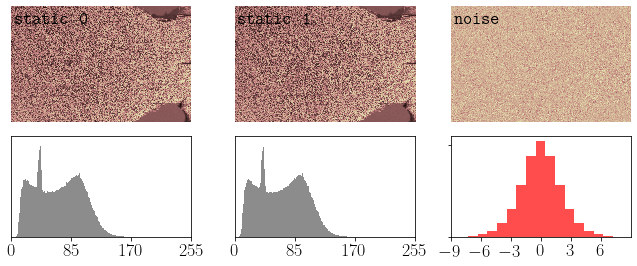

In [185]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv

plt.rcParams['axes.facecolor'] = (1, 1, 1)
plt.rcParams['figure.facecolor'] = (1, 1, 1)
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 18
plt.rcParams['image.cmap'] = 'pink' # 'afmhot', 'hot', 'gist_heat'
plt.rcParams['text.usetex'] = True
params = {"ytick.color" : (0, 0, 0),
          "xtick.color" : (0, 0, 0),
          "grid.color" : (.8, .8, .8),
          "text.color" : (.7, .7, .7),
          "axes.labelcolor" : (0, 0, 0),
          "axes.edgecolor" : (0, 0, 0)}
plt.rcParams.update(params)

caminho = 'X:\\jxavier\\Orient\\Erasmus\\2021\\Polytech_Clermont-FD\\Stanislas\\EXP\\MMCGTests\\e1O1\\static\\'
proj = 'e1O1_static_'
cwd = os.path.join(caminho, proj)
i0 = cv.imread(os.path.join(caminho,proj)+'0000_0.tiff', cv.IMREAD_GRAYSCALE)
i0f = i0.astype('float')
H, V = i0.shape
hist_i0, bins_i0 = np.histogram(i0, 256, [0, 255])
i1 = cv.imread(os.path.join(caminho,proj)+'0001_0.tiff', cv.IMREAD_GRAYSCALE)
i1f = i1.astype('float')
hist_i1, bins_i1 = np.histogram(i1, 256, [0, 255])
# inois = np.zeros(i0.shape, dtype=float)
inois = i1f-i0f
# threh = 10
# inois[inois>10] = np.nan
hist_in, bins_in = np.histogram(inois)

nois_avg = np.mean(inois)
nois_max = np.max(inois)
nois_min = np.min(inois)
nois_std = np.std(inois)
nois_stdp = nois_std/255*100
print(f'Noise.Max  = {nois_max:10.2f}')
print(f'Noise.Min  = {nois_min:10.2f}')
print(f'Noise.Avg  = {nois_avg:10.3e}')
print(f'Noise.Std  = {nois_std:10.2f}')
print(f'Noise.Std% = {nois_stdp:8.2f} % (8 bits)')

fig = plt.figure(figsize=(10,4))
# reference 0
fig.subplots_adjust(top=0.8)
ax11 = fig.add_axes([0.09,0.5,0.25,0.40])
ax11.imshow(i0, aspect="auto")
plt.axis('off')
ax11.annotate('static 0', xy=(3, 1),  xycoords='data', color='black',
            xytext=(0.02, .85), textcoords='axes fraction')
ax21 = fig.add_axes([0.09,0.1,0.25,0.35])
ax21.hist(i0.flatten(), bins=256, range=(0, 256), color='gray',alpha=0.9)
ax21.axes.get_yaxis().set_visible(False)
xrang = np.arange(0, 256, 85)
ax21.set_xticks(xrang)
plt.xlim([0, 255])
plt.axis('on')
# reference 1
ax12 = fig.add_axes([0.4,0.5,0.25,0.40])
ax12.imshow(i1, aspect="auto")
plt.axis('off')
ax12.annotate('static 1', xy=(3, 1),  xycoords='data', color='black',
            xytext=(0.02, .85), textcoords='axes fraction')
ax22 = fig.add_axes([0.4,0.1,0.25,0.35])
ax22.hist(i1.ravel(), 256, [0, 256], color='gray',alpha=0.9)
ax22.axes.get_yaxis().set_visible(False)
xrang = np.arange(0, 256, 85)
ax22.set_xticks(xrang)
plt.xlim([0, 255])
plt.axis('on')
# noise residual
ax13 = fig.add_axes([0.7,0.5,0.25,0.40])
ax13.imshow(inois, aspect="auto")
plt.axis('off')
ax13.annotate('noise', xy=(3, 1),  xycoords='data', color='black',
            xytext=(0.02, .85), textcoords='axes fraction')
ax23 = fig.add_axes([0.7,0.1,0.25,0.35])
# counts, vals = np.histogram(inois, bins=range(2 ** 8))
# plt.bar(range(0, (2 ** 8) - 1), counts)
ax23.hist(inois.ravel(), 30, color='red',alpha=0.7)
xrang = np.arange(-9, 9, 3)
ax23.set_xticks(xrang)
plt.xlim([-9, 9])
ax23.set_yticklabels([])
plt.show()
fig.savefig(os.path.join(caminho,proj)+'noise.png', dpi=300, bbox_inches='tight')